# Time Series Forecasting

#### Problem statement: To Predict the Airline Traffic passengers given monthly past data from 1949

##### Importing Libraries and Dataset:

In [488]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [490]:
import warnings
warnings.filterwarnings("ignore")

In [492]:
df = pd.read_csv("airline-passenger-traffic.csv", header=None)
df.columns = ["Month", "Passengers"]

In [493]:
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [495]:
df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m-%d")
df = df.set_index("Month")
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


## Time Series Analysis:

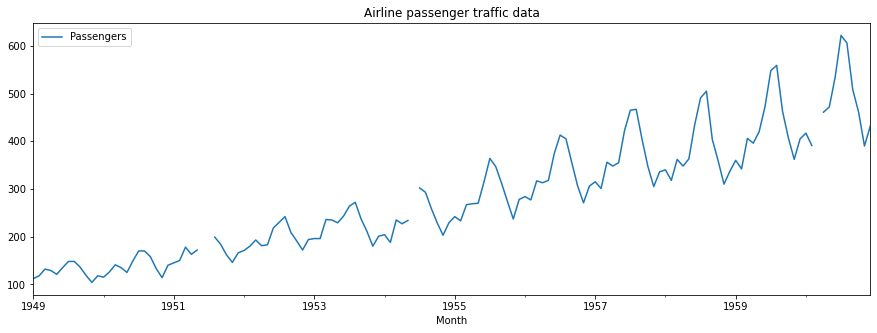

In [496]:
df.plot(figsize = (15,5))
plt.legend(loc = "best")
plt.title("Airline passenger traffic data")
plt.show(block=False)

In [497]:
df.isnull().sum()

Passengers    4
dtype: int64

### Missing Value Treatment:

#### Mean Imputation:

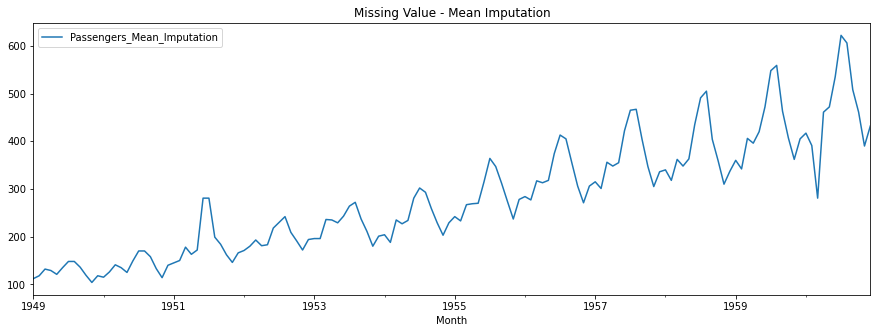

In [498]:
df["Passengers_Mean_Imputation"] = df["Passengers"].fillna(df["Passengers"].mean())

df[["Passengers_Mean_Imputation"]].plot(figsize = (15,5))
plt.legend(loc = "best")
plt.title("Missing Value - Mean Imputation")
plt.show(block=False)

#### Linear Interpolation:

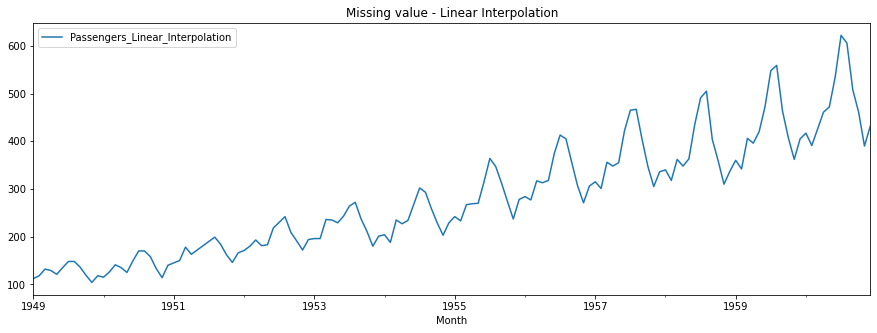

In [499]:
df["Passengers_Linear_Interpolation"] = df["Passengers"].interpolate(method="linear")

df[["Passengers_Linear_Interpolation"]].plot(figsize=(15,5))
plt.legend(loc="best")
plt.title("Missing value - Linear Interpolation")
plt.show(block = False)

Using Linear Interpolation to impute the missing values

In [500]:
df["Passengers"] = df["Passengers_Linear_Interpolation"]

### Outlier Treatement:

#### Box Plot and Interquartile range:

<AxesSubplot:xlabel='Passengers'>

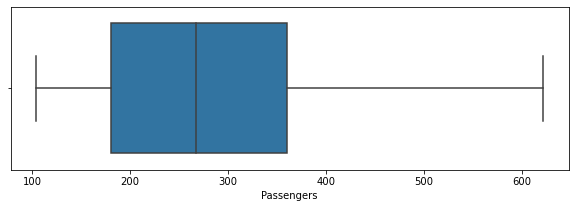

In [591]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Passengers"], whis=1.5)

<AxesSubplot:xlabel='Passengers'>

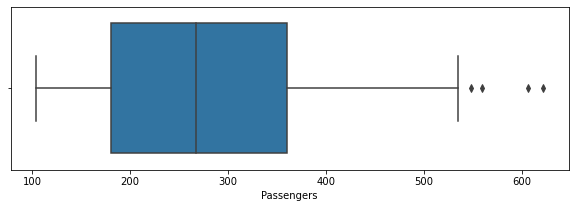

In [502]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df["Passengers"], whis=1)

#### Histogram Plot:

<AxesSubplot:>

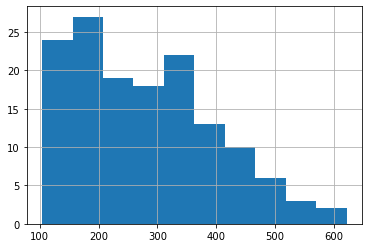

In [503]:
df["Passengers"].hist()

No Outliers found

### Time Series Decomposition:

#### Additive Seasonal Decomposition:

In [504]:
from pylab import rcParams
import statsmodels.api as sm

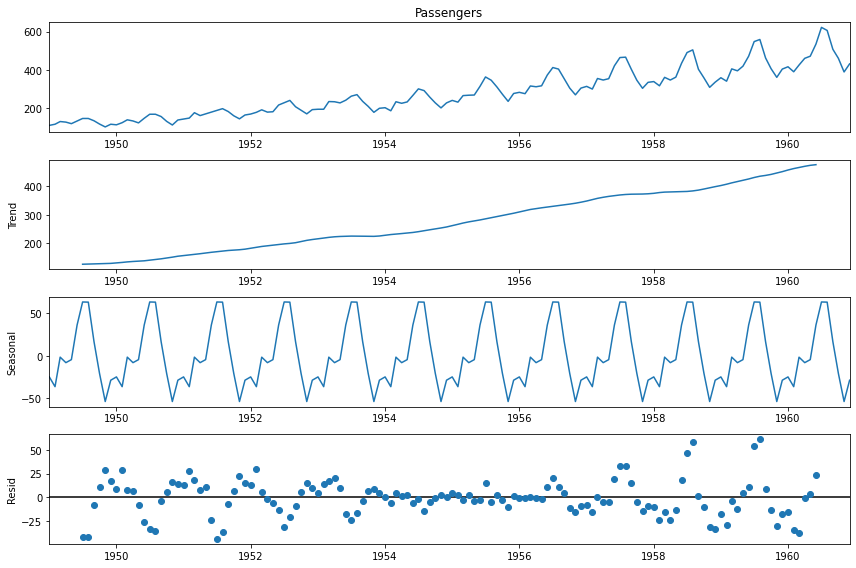

In [505]:
rcParams["figure.figsize"] = 12,8
decomposition = sm.tsa.seasonal_decompose(df["Passengers"], model="additive")
decomposition.plot()
plt.show()

#### Multiplicative Seasonal Decompostion:

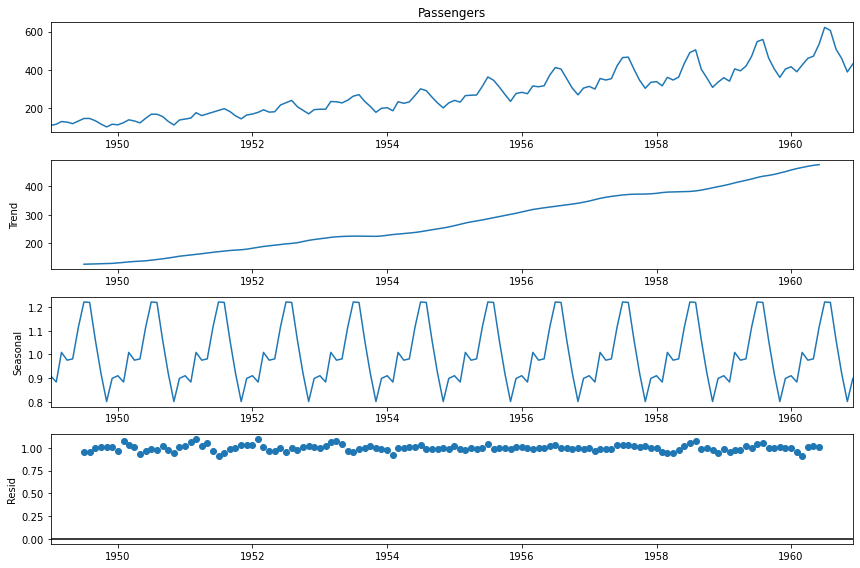

In [506]:
decomposition = sm.tsa.seasonal_decompose(df["Passengers"], model="multiplicative")
fig = decomposition.plot()
plt.show()

### Build and Evaluate time series forecast:

#### Splitting time series into train and test sets:

In [507]:
train_len = 120
train = df[0:train_len]

test = df[train_len:]


## 1.Naive method:

In [508]:
y_hat_naive = test.copy()

y_hat_naive["Naive_forecast"] = train["Passengers"][train_len-1]

### Plot train, test and forecast:

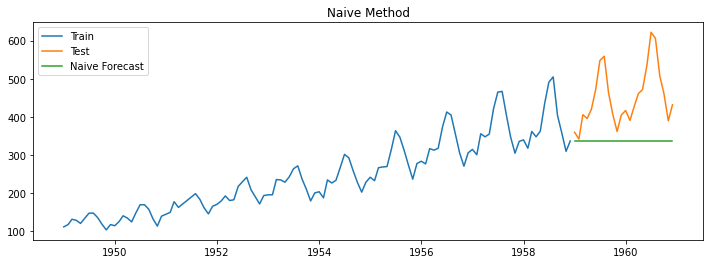

In [509]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_naive["Naive_forecast"], label = "Naive Forecast")
plt.legend(loc = "best")
plt.title("Naive Method")
plt.show()

## 2.Simple Averege method:

In [510]:
y_hat_avg = test.copy()

y_hat_avg["Avg Forecast"] = train["Passengers"].mean()


### Plot train, test and forecast:

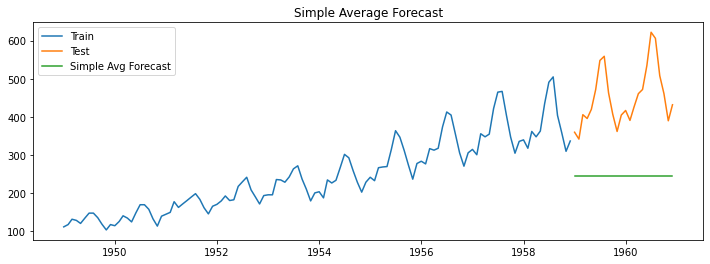

In [511]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_avg["Avg Forecast"], label = "Simple Avg Forecast")
plt.legend(loc = "best")
plt.title("Simple Average Forecast")
plt.show()

### Calculate  RMSE and MAPE to evaluate forecast:

In [512]:
from sklearn.metrics import mean_squared_error

In [513]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_naive["Naive_forecast"])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_naive["Naive_forecast"])/test["Passengers"]))*100, 2)

In [514]:


print("Root mean square for Naive forecast ", rmse)
print("Mean Absolute percentage Error", mape)

Root mean square for Naive forecast  137.51
Mean Absolute percentage Error 23.63


In [515]:
results = pd.DataFrame({"Method":["Naive method"], "MAPE":[mape], "RMSE": [rmse]})
results


,Method,MAPE,RMSE
0,Naive method,23.63,137.51


### Calculate RMSE and MAPE to evaluate forecast:

In [516]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_avg["Avg Forecast"])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_avg["Avg Forecast"])/test["Passengers"]))*100,2)

In [517]:
print(rmse , mape)

219.69 44.28


In [518]:
tempresults = pd.DataFrame({"Method":["Simple Average method"], "MAPE":[mape], "RMSE":[rmse]})
tempresults

,Method,MAPE,RMSE
0,Simple Average method,44.28,219.69


In [519]:
results = pd.concat([results, tempresults])

In [520]:
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69


## 3. Simple moving average method:

In [521]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma["sma_forecast"] = df["Passengers"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

### plot train, test and forecast:

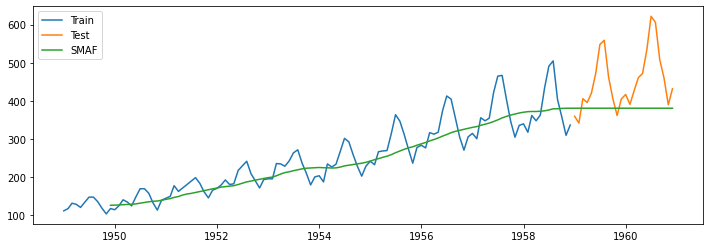

In [522]:
plt.figure(figsize=(12,4))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_sma["sma_forecast"], label = "SMAF")
plt.legend(loc = "best")
plt.show()

### Calculate RMSE and MAPE:

In [523]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"] - y_hat_sma["sma_forecast"][train_len:])/test["Passengers"])*100,2)

In [524]:
tempResluts = pd.DataFrame({"Method":["Simple moving average method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempResluts])

In [525]:
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33


## 4. Simple Exponential Smoothing:

In [526]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [527]:
model = SimpleExpSmoothing(train["Passengers"])

model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

y_hat_ses = test.copy()
y_hat_ses["SESF"] = model_fit.forecast(24) 

### Plot train, test and forecast:

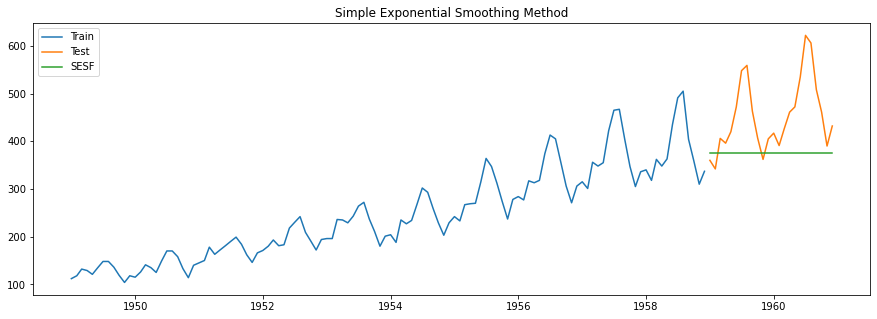

In [528]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_ses["SESF"], label="SESF")
plt.legend(loc = "best")
plt.title("Simple Exponential Smoothing Method")
plt.show()

### Calculating RMSE and MAPE:

In [529]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_ses["SESF"])).round(2)
mape = np.round(np.mean(np.abs(test["Passengers"]-y_hat_ses["SESF"])/test["Passengers"])*100,2)

tempresults = pd.DataFrame({"Method":["Simple exponential smoothing method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65


## 5. Holt's Exponential Smoothing:

In [530]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [531]:
model = ExponentialSmoothing(np.asarray(train["Passengers"]), seasonal_periods= 12, trend = "additive", 
                            seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01, optimized=False )
print(model_fit.params)

y_hat_holt = test.copy()
y_hat_holt["Holt Forecast"] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### plot train, test and forecast:

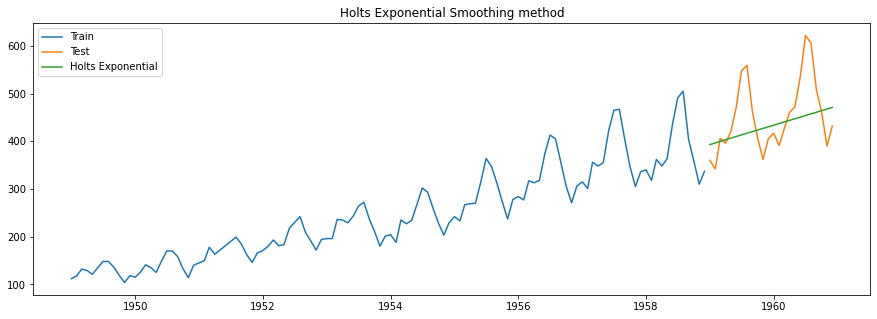

In [532]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_holt["Holt Forecast"], label = "Holts Exponential")
plt.legend(loc = "best")
plt.title("Holts Exponential Smoothing method")
plt.show()

### Calculating RMSE and MAPE:

In [533]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_holt["Holt Forecast"])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_holt["Holt Forecast"])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Holts Exponential"], "RMSE":[rmse], "MAPE":[mape]})


In [534]:
results = pd.concat([results, tempresults])

In [535]:
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94


## 6. 1 Holts winter Exponential smoothing (additive):

In [536]:
y_hat_hwa = test.copy()

In [537]:
model = ExponentialSmoothing(np.asarray(train["Passengers"]), seasonal_periods=12, trend = "add", seasonal="add")
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.23615815135772011, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7638418486422799, 'damping_trend': nan, 'initial_level': 204.98775010890893, 'initial_trend': 2.277125578879114, 'initial_seasons': array([ -95.26477839,  -89.72946402,  -77.22895316,  -82.34755114,
        -91.04048136,  -76.87513463,  -64.61027726,  -66.56007629,
        -80.69101219,  -99.57005515, -114.23801844,  -98.02808547]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [538]:
y_hat_hwa["HWAF"] = model_fit.forecast(24)

### Plot train, test and forecast:

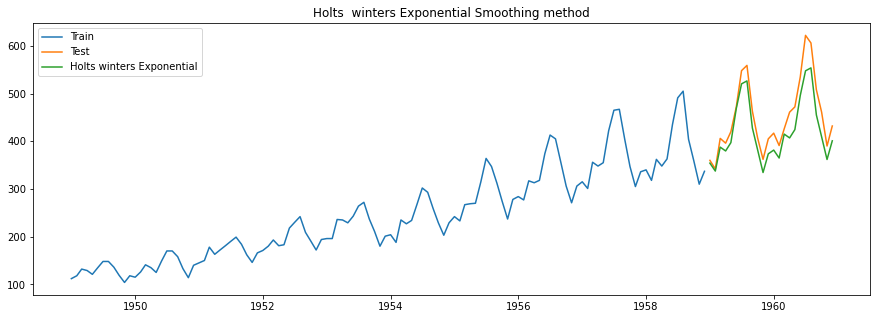

In [539]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_hwa["HWAF"], label = "Holts winters Exponential")
plt.legend(loc = "best")
plt.title("Holts  winters Exponential Smoothing method")
plt.show()

### Calculating  RMSE and MAPE:

In [540]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_hwa["HWAF"])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_hwa["HWAF"])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Holts winters Exponential"], "RMSE":[rmse], "MAPE":[mape]})


In [541]:
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86


## 6.2 Holts winter Exponential method (Multiplicative) : 

In [542]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train["Passengers"]), seasonal_periods=12, trend = "add", seasonal="mul")
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm["HWMF"] = model_fit.forecast(24)


{'smoothing_level': 0.3655865614456789, 'smoothing_trend': 8.003382780364158e-08, 'smoothing_seasonal': 0.6344134168549864, 'damping_trend': nan, 'initial_level': 182.90595507171616, 'initial_trend': 3.9608579040286487, 'initial_seasons': array([0.59936353, 0.63043657, 0.69295765, 0.65877107, 0.60804705,
       0.664941  , 0.72308922, 0.71817668, 0.65513481, 0.57089973,
       0.50755226, 0.58555887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast:

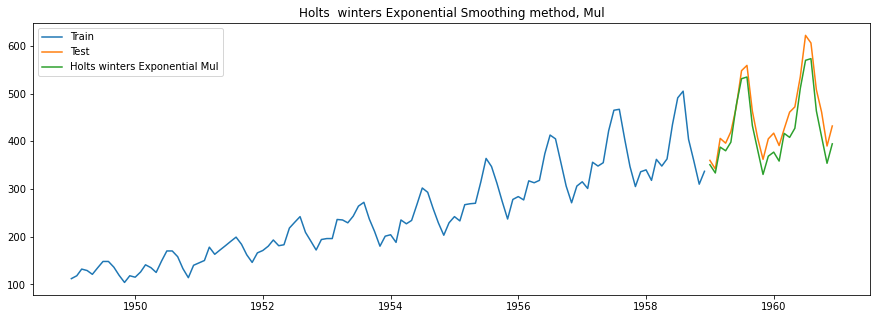

In [543]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_hwm["HWMF"], label = "Holts winters Exponential Mul")
plt.legend(loc = "best")
plt.title("Holts  winters Exponential Smoothing method, Mul")
plt.show()

### Calculating RMSE and MAPE:

In [544]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_hwm["HWMF"])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_hwm["HWMF"])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Holts winters Exponential, mul"], "RMSE":[rmse], "MAPE":[mape]})

results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46


## Auto Regressive models:

### Stationary vs non - Stationary time series:

#### Time Series plot:

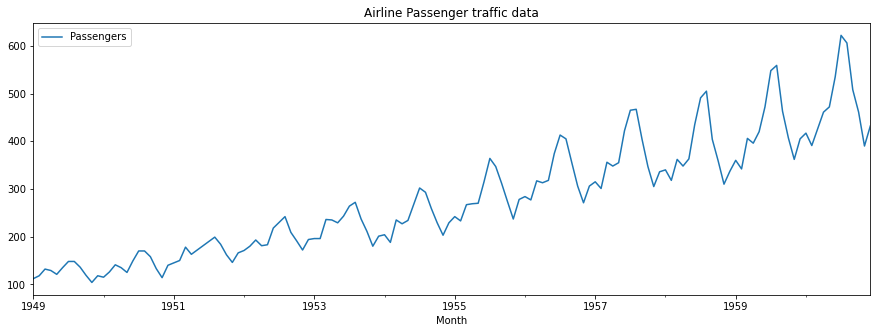

In [545]:
df["Passengers"].plot(figsize=(15,5))
plt.legend(loc = "best")
plt.title("Airline Passenger traffic data")
plt.show()

### Augumented dickey fuller (ADF) test:

In [546]:
from statsmodels.tsa.stattools import adfuller

In [547]:
adf_test = adfuller(df["Passengers"])

print("ADF Statistic: %f", adf_test[0])
print("Critical value @ 0.05: %.2f",  adf_test[4]["5%"])
print("P - value: %f" ,  adf_test[1])

ADF Statistic: %f 0.8946087940823843
Critical value @ 0.05: %.2f -2.8840418343195267
P - value: %f 0.9930195647605924


Time Series is not stationary

### KPSS Test:

In [548]:
from statsmodels.tsa.stattools import kpss

In [549]:
kpss_test = kpss(df["Passengers"])

print("KPSS Statistics:", kpss_test[0])
print("Critical value @ 0.05:" ,kpss_test[3]["5%"])
print("P - value:" ,kpss_test[1])

KPSS Statistics: 1.0520501504573108
Critical value @ 0.05: 0.463
P - value: 0.01


Time series is not stationary

### Box Cox transformation:

In [550]:
from scipy.stats import boxcox

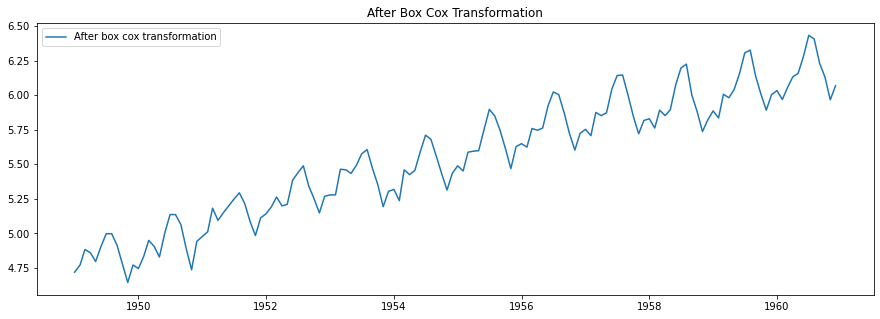

In [551]:
df_boxcox = pd.Series(boxcox(df["Passengers"], lmbda = 0), index = df.index)

plt.figure(figsize=(15,5))
plt.plot(df_boxcox, label = "After box cox transformation")
plt.legend(loc = "best")
plt.title("After Box Cox Transformation")
plt.show()

### Differencing:

In [552]:
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), index=df.index)

df_boxcox_diff.dropna(inplace=True)



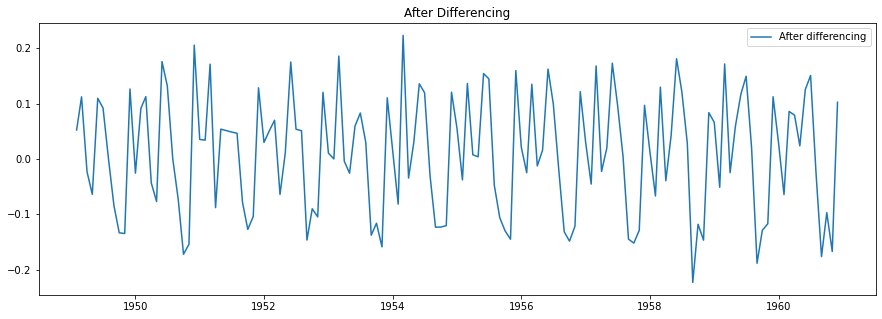

In [553]:
plt.figure(figsize=(15,5))
plt.plot(df_boxcox_diff, label = "After differencing")
plt.legend(loc = "best")
plt.title("After Differencing")
plt.show()

### ADF test:

In [554]:
adf_test = adfuller(df_boxcox_diff)

print("ADF Statistic: %f", adf_test[0])
print("Critical value @ 0.05: %.2f",  adf_test[4]["5%"])
print("P - value: %f" ,  adf_test[1])

ADF Statistic: %f -3.2901138184594267
Critical value @ 0.05: %.2f -2.8840418343195267
P - value: %f 0.015326212237943804


### KPSS test:

In [555]:
kpss_test = kpss(df_boxcox_diff)

print("KPSS Statistics:", kpss_test[0])
print("Critical value @ 0.05:" ,kpss_test[3]["5%"])
print("P - value:" ,kpss_test[1])

KPSS Statistics: 0.1018708149351519
Critical value @ 0.05: 0.463
P - value: 0.1


### Auto Correalation function (ACF) Plot:

In [556]:
from statsmodels.graphics.tsaplots import plot_acf

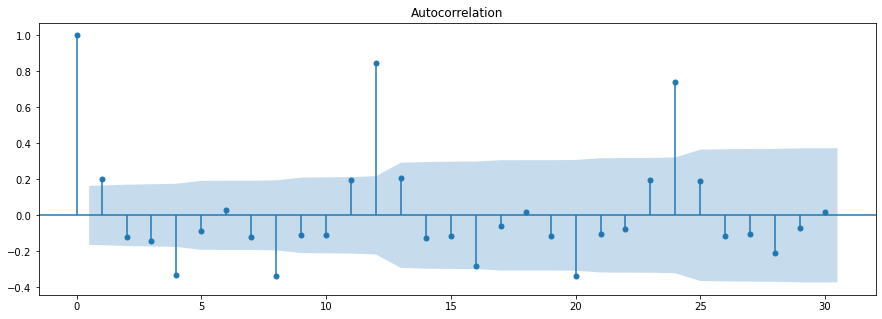

In [557]:
plt.figure(figsize=(15,5))

plot_acf(df_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

### Partial Auto Correlation plot(PACF) plot:

In [558]:
from statsmodels.graphics.tsaplots import plot_pacf

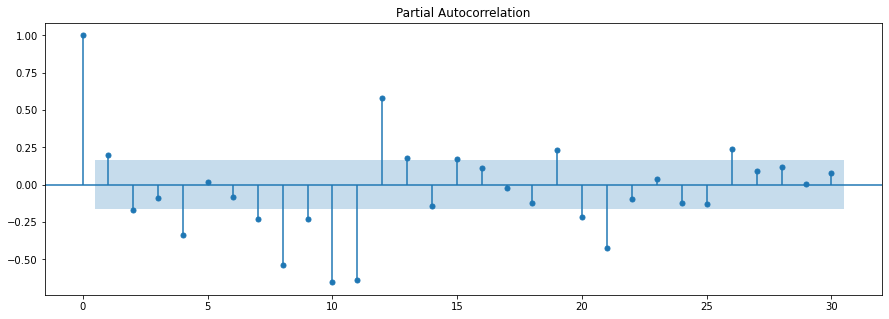

In [559]:
plt.figure(figsize=(15,5))
plot_pacf(df_boxcox_diff,ax= plt.gca(), lags = 30)
plt.show()

### Split into Training and test data sets:

In [560]:
train_df_boxcox = df_boxcox[:train_len]
test_df_boxcox = df_boxcox[train_len:]
train_df_boxcox_diff = df_boxcox_diff[:train_len-1]
test_df_boxcox_diff = df_boxcox_diff[train_len-1:]

## 7. Auto regressive(AR) model

In [561]:
from statsmodels.tsa.arima_model import ARIMA

In [562]:
model = ARIMA(train_df_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


## Recover original time Series forecast:

In [563]:
y_hat_ar = df_boxcox_diff.copy()

y_hat_ar["ar_forecast_boxcox_diff"] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ar["ar_forecast_boxcox"] = y_hat_ar["ar_forecast_boxcox_diff"].cumsum()
y_hat_ar["ar_forecast_boxcox"] = y_hat_ar["ar_forecast_boxcox"].add(df_boxcox[0])
y_hat_ar["ar_forecast"] = np.exp(y_hat_ar["ar_forecast_boxcox"])

## plot train, test and forecast data:

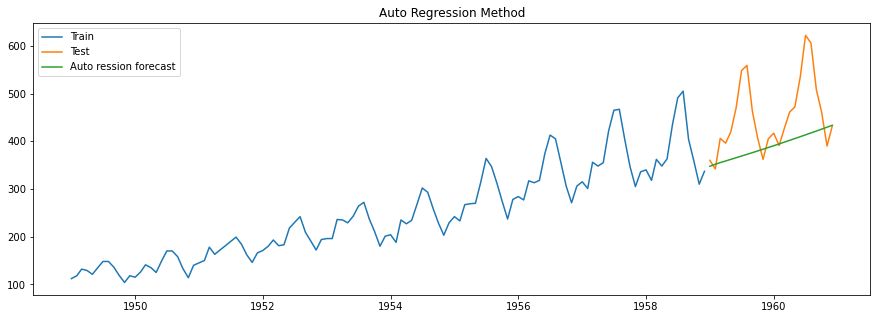

In [564]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_ar["ar_forecast"][test.index.min():], label = "Auto ression forecast")
plt.legend(loc = "best")
plt.title("Auto Regression Method")
plt.legend()

## Calculation of RMSE and MAPE:

In [565]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_ar["ar_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_ar["ar_forecast"][test.index.min():])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Auto regressice (AR) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results


,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39


## 8. Moving Average method(MA):

In [566]:
model = ARIMA(train_df_boxcox_diff, order = (0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


## Recover original time series forecast:

In [567]:
y_hat_ma = df_boxcox_diff.copy()
y_hat_ma["ma_forecast_boxcox_diff"] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma["ma_forecast_boxcox"] = y_hat_ma["ma_forecast_boxcox_diff"].cumsum()
y_hat_ma["ma_forecast_boxcox"] = y_hat_ma["ma_forecast_boxcox"].add(df_boxcox[0])
y_hat_ma["ma_forecast"] = np.exp(y_hat_ma["ma_forecast_boxcox"])

## Plot train, test and forecast data:

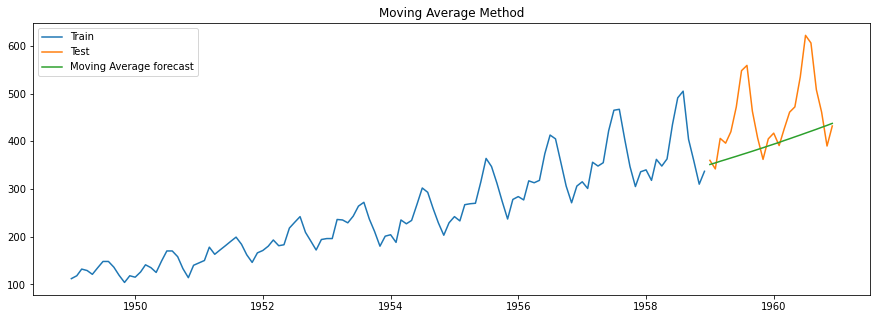

In [568]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_ma["ma_forecast"][test.index.min():], label= "Moving Average forecast")
plt.legend(loc = "best")
plt.title("Moving Average Method")
plt.show()

## Calculation of RMSE and MAPE:

In [569]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_ma["ma_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_ma["ma_forecast"][test.index.min():])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Moving Average (MA) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39
0,Moving Average (MA) method,13.39,91.21


## 9. Auto regressive moving average (ARMA) method:

In [570]:
model = ARIMA(train_df_boxcox_diff, order = (1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64


## Recovering original time series forecast:

In [571]:
y_hat_arma = df_boxcox_diff.copy()
y_hat_arma["arma_forecast_boxcox_diff"] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arma["arma_forecast_boxcox"] = y_hat_arma["arma_forecast_boxcox_diff"].cumsum()
y_hat_arma["arma_forecast_boxcox"] = y_hat_arma["arma_forecast_boxcox"].add(df_boxcox[0])
y_hat_arma["arma_forecast"] = np.exp(y_hat_arma["arma_forecast_boxcox"])

## Plot train, test and forecast:

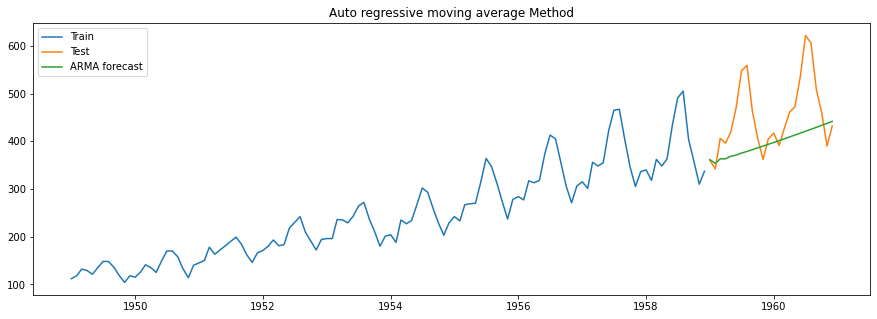

In [572]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_arma["arma_forecast"][test.index.min():], label= "ARMA forecast")
plt.legend(loc = "best")
plt.title("Auto regressive moving average Method")
plt.show()

## Calculation of RMSE and mape:

In [573]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_arma["arma_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_arma["arma_forecast"][test.index.min():])/test["Passengers"]))*100,2)

tempresults = pd.DataFrame({"Method":["Auto regressive moving average (ARMA) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39
0,Moving Average (MA) method,13.39,91.21
0,Auto regressive moving average (ARMA) method,12.89,88.88


## 10.ARIMA (Auto regressive integrated moving average) method:

In [574]:
model = ARIMA(train_df_boxcox, order = (1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64


## Recovering original time series forecast:

In [575]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima["arima_forecast_boxcox_diff"] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima["arima_forecast_boxcox"] = y_hat_arima["arima_forecast_boxcox_diff"].cumsum()
y_hat_arima["arima_forecast_boxcox"] = y_hat_arima["arima_forecast_boxcox"].add(df_boxcox[0])

y_hat_arima["arima_forecast"] = np.exp(y_hat_arima["arima_forecast_boxcox"])

## Plot train, test and forecast:

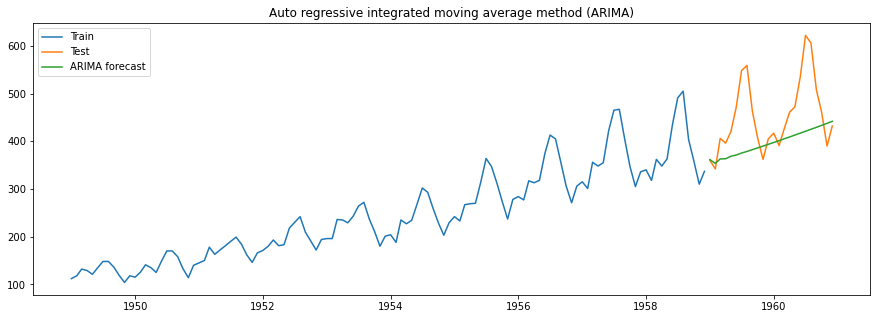

In [576]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_arima["arima_forecast"][test.index.min():], label = "ARIMA forecast")
plt.legend(loc = "best")
plt.title("Auto regressive integrated moving average method (ARIMA)")
plt.show()

## Calculation of RMSE and MAPE:

In [577]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_arima["arima_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_arima["arima_forecast"][test.index.min():])/test["Passengers"]))*100,2)
                    
tempresults = pd.DataFrame({"Method":["Auto regressive integrated moving average (ARIMA) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39
0,Moving Average (MA) method,13.39,91.21
0,Auto regressive moving average (ARMA) method,12.89,88.88


## 10. Seasonal Auto regressive integrated moving average method: (SARIMA)

In [578]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [579]:
model = SARIMAX(train_df_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1       0.388961
ma.L1      -0.680681
ar.S.L12   -0.044838
ma.S.L12   -0.513169
sigma2      0.001408
dtype: float64


## Recovering original time series forecast:

In [580]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima["sarima_forecast_boxcox"] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_sarima["sarima_forecast"] = np.exp(y_hat_sarima["sarima_forecast_boxcox"])

## Plot train, test and forecast:

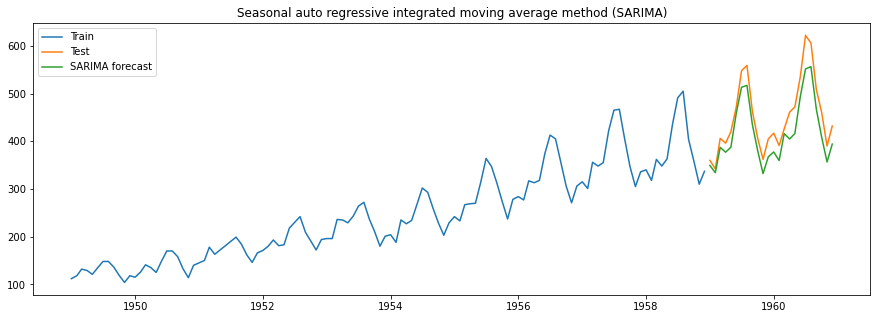

In [581]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_sarima["sarima_forecast"][test.index.min():], label = "SARIMA forecast")
plt.legend(loc = "best")
plt.title("Seasonal auto regressive integrated moving average method (SARIMA)")
plt.show()

## Calculation of RMSE and MAPE:

In [582]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_sarima["sarima_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_sarima["sarima_forecast"][test.index.min():])/test["Passengers"]))*100,2)
                    
tempresults = pd.DataFrame({"Method":["(SARIMA) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39
0,Moving Average (MA) method,13.39,91.21
0,Auto regressive moving average (ARMA) method,12.89,88.88


## 11. Seasonal Autoregressive integrated moving average with exogenous variable (SARIMA) method:

In [583]:
promotion = pd.read_csv("promotion.csv", header = None)
promotion.columns = ["Month", "Event"]
promotion["Month"] = pd.to_datetime(promotion["Month"], format= "%Y-%m")
promotion = promotion.set_index("Month")

In [584]:
promotion.head()

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0


In [585]:
promo_train = promotion[:train_len]
promo_test = promotion[train_len:]

In [586]:
model = SARIMAX(train_df_boxcox, order = (1,1,1), seasonal_order=(1,1,1,12), exog = promo_train)
model_fit = model.fit()
print(model_fit.params)

Event       0.034365
ar.L1       0.479088
ma.L1      -0.741942
ar.S.L12   -0.064379
ma.S.L12   -0.557683
sigma2      0.001334
dtype: float64


## Recovering original time series forecast:

In [587]:
y_hat_sarimax = df_boxcox_diff.copy()
y_hat_sarimax["sarimax_forecast_boxcox"] = model_fit.predict(test.index.min(), test.index.max(), exog = promo_test)
y_hat_sarimax["sarimax_forecast"] = np.exp(y_hat_sarimax["sarimax_forecast_boxcox"])

## Plot train, test and Forecast:

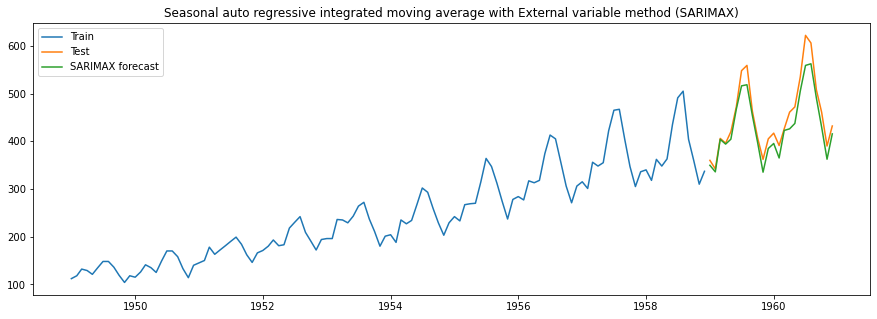

In [588]:
plt.figure(figsize=(15,5))
plt.plot(train["Passengers"], label = "Train")
plt.plot(test["Passengers"], label = "Test")
plt.plot(y_hat_sarimax["sarimax_forecast"][test.index.min():], label = "SARIMAX forecast")
plt.legend(loc = "best")
plt.title("Seasonal auto regressive integrated moving average with External variable method (SARIMAX)")
plt.show()

## Calculation of RMSE and MAPE

In [589]:
rmse = np.sqrt(mean_squared_error(test["Passengers"], y_hat_sarimax["sarimax_forecast"][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs((test["Passengers"]-y_hat_sarimax["sarimax_forecast"][test.index.min():])/test["Passengers"]))*100,2)
                    
tempresults = pd.DataFrame({"Method":["(SARIMAX) method"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([results, tempresults])
results

,Method,MAPE,RMSE
0,Naive method,23.63,137.51
0,Simple Average method,44.28,219.69
0,Simple moving average method,15.54,103.33
0,Simple exponential smoothing method,16.49,107.65
0,Holts Exponential,11.11,71.94
0,Holts winters Exponential,6.72,35.86
0,"Holts winters Exponential, mul",6.45,32.46
0,Auto regressice (AR) method,13.77,93.39
0,Moving Average (MA) method,13.39,91.21
0,Auto regressive moving average (ARMA) method,12.89,88.88


SARIMAX method gives minimum RMSE and MAPE values

In [592]:
pd.set_option("display.max_rows", None)

In [595]:
y_hat_sarimax["sarimax_forecast"]

1959-01-01    349.577781
1959-02-01    335.859276
1959-03-01    403.895741
1959-04-01    394.037682
1959-05-01    404.284570
1959-06-01    467.147722
1959-07-01    516.128193
1959-08-01    518.456154
1959-09-01    454.041237
1959-10-01    397.373958
1959-11-01    335.165194
1959-12-01    384.819435
1960-01-01    395.328045
1960-02-01    364.929799
1960-03-01    422.683657
1960-04-01    426.000019
1960-05-01    437.356634
1960-06-01    505.325616
1960-07-01    559.023560
1960-08-01    562.372931
1960-09-01    490.714704
1960-10-01    429.886667
1960-11-01    362.332739
1960-12-01    415.468128
Freq: MS, Name: predicted_mean, dtype: float64